In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('auto-mpg.csv',header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

# 데이터 확인 코드
print(df.head())
print(df.info())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2 

ㄴ horsepower에서 Dtype이 숫자에 '?'가 섞여있어서 object라고 뜬다.

In [3]:
print(df.describe()) #계산 가능한 요소들을 계산해서 보여주는것.
print(df['horsepower'].unique()) # horsepower 열의 고유값 확인

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  
['130.0' '165.0' '150.0' '140.0' '198.0' '220

In [6]:
df['horsepower'].replace('?',np.nan, inplace=True) # ?를 nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True) # 누락데이터 행을 삭제
df['horsepower']=df['horsepower'].astype('float') # 문자열을 실수형으로 변환
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [7]:
ndf = df[['mpg','cylinders','horsepower','weight']]
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


### 종속 변수 Y인 '연비(mgp)'와 다른 변수 간의 선형관계를 그래프(산점도)로 확인

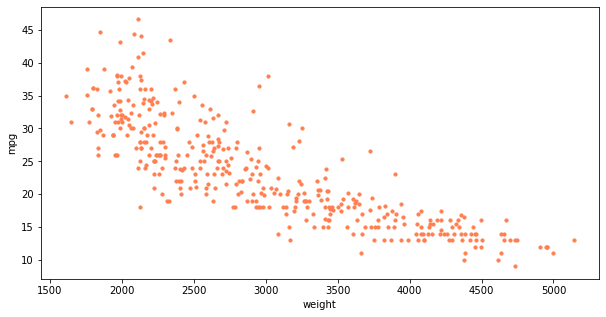

In [10]:
# matplotlib로 산점도 그리기
ndf.plot(kind='scatter',x='weight',y='mpg',c='coral',s=10,figsize=(10,5)) #color, 점크기
plt.show()

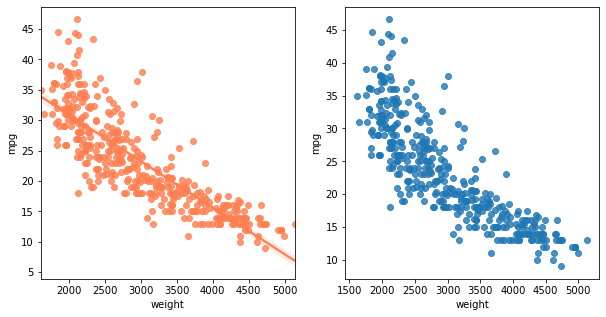

In [22]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight', y='mpg',data=ndf, ax=ax1, color = 'coral') # 회귀선 표시
sns.regplot(x='weight', y='mpg',data=ndf, ax=ax2, fit_reg=False) #회귀선 미표시
plt.show()

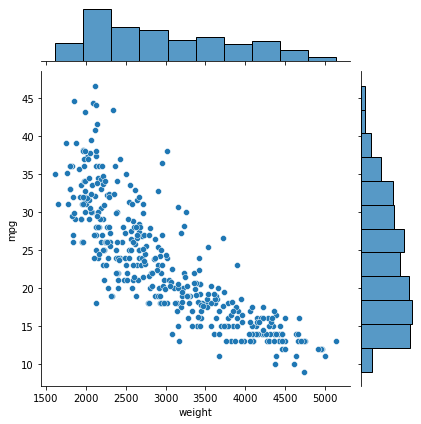

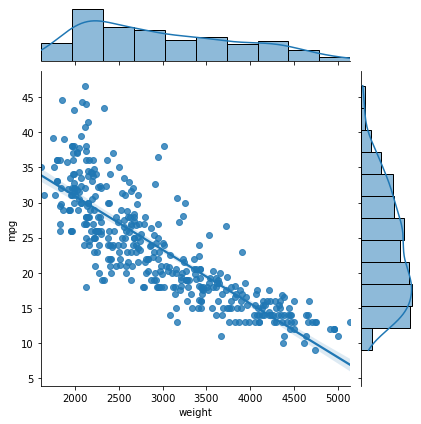

In [23]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf) # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf) # 회귀선 표시
plt.show()

## seaborn pariplot으로 두변수 간의 모든 경우의 수 그리기
### info, describe 같은 여러개의 데이터를 한눈에 볼 수 있게 한다.

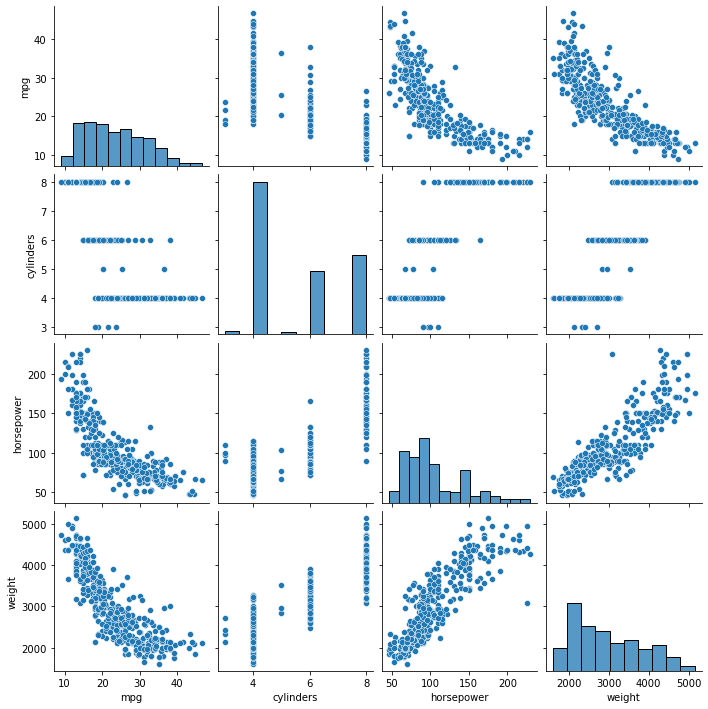

In [24]:
sns.pairplot(ndf)
plt.show()